In [109]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import curve_fit

In [110]:
#Obtención de los datos
def Data(l:str):
    direccion = l
    data = pd.read_csv(direccion, delimiter='\t')
    return data

Data_ = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Doble rendija\Doble rendija.txt")
Datafit = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Doble rendija\Frauhoffer fit.txt")

x = Data_['mm']
Ida = Data_['promedio']
tfit =Datafit['Tr']
Vfit = Datafit['Vr']
stdfit = Datafit['Desv']
In = []
xn = []

V = []
t = []
#Correcion del offset y el corrimiento de x (el max esta en 3.09 mm). Pasar a V y theta
for i in range(len(Ida)):
    a=Ida[i]-3
    b=x[i]-3.09
    In.append(a)
    xn.append(b)

    V.append(a/1000)
    t.append( np.arctan( (b) / 356 )) #Esta en mm no hay necesidad de conversion
len(stdfit[1:])

145

**Approx de Fresnel**

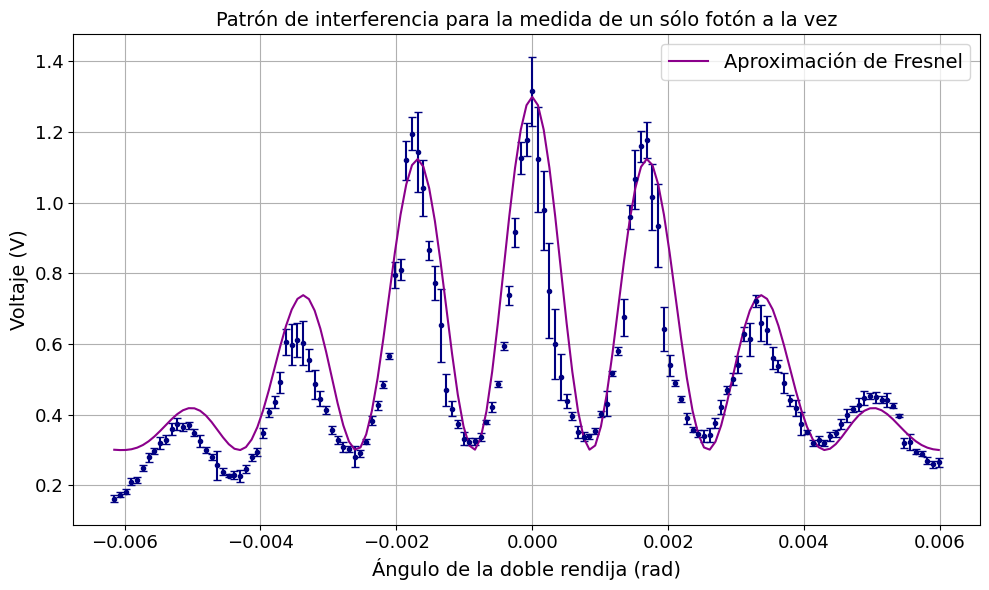

In [111]:
def Double(theta):
    a = 0.1
    d = 0.457
    lamda = 0.000670
    V_0 = 1.0
    al = (np.pi*a)/lamda * np.sin(theta)*0.3
    be = (np.pi*d)/lamda * np.sin(theta)*0.85
    return V_0*(np.cos(be)**2)*(np.sinc(al)**2)+0.3

fig1, ax1 = plt.subplots(1,1, figsize = (10, 6))

ax1.set_title('Patrón de interferencia para la medida de un sólo fotón a la vez',fontsize=14)

ax1.errorbar(t[30:175],V[30:175],fmt='.',yerr=stdfit[1:],color='navy',capsize=3)
ax1.plot(t[30:175],Double(t[30:175]),label='Aproximación de Fresnel',color='darkmagenta')
ax1.set_ylabel(r"Voltaje (V)",fontsize=14)
ax1.set_xlabel(r'Ángulo de la doble rendija (rad)',fontsize=14)
ax1.grid()
ax1.legend(fontsize=14)
ax1.tick_params(axis='both',labelsize=13)
fig1.tight_layout()

# fig1.savefig('Fresnel.pdf')

**Aprox de Fraunhoffer**

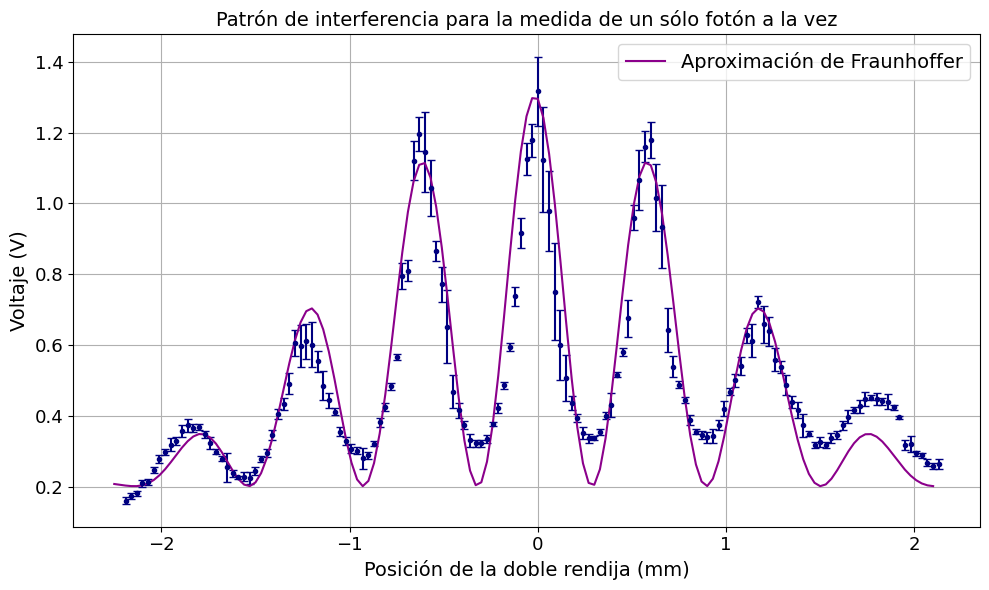

In [112]:
tfitc = []
for i in range(len(tfit)):
    tfitc.append(tfit[i]-3.09)
fig2, ax2 = plt.subplots(1,1, figsize = (10, 6))

ax2.set_title('Patrón de interferencia para la medida de un sólo fotón a la vez',fontsize=14)

ax2.errorbar(xn[30:175],V[30:175],fmt='.',yerr=stdfit[1:],color='navy',capsize=3)
ax2.plot(tfitc,Vfit,label='Aproximación de Fraunhoffer',color='darkmagenta')
ax2.set_ylabel(r"Voltaje (V)",fontsize=14)
ax2.set_xlabel(r'Posición de la doble rendija (mm)',fontsize=14)
ax2.grid()
ax2.legend(fontsize=14)
ax2.tick_params(axis='both',labelsize=13)
fig2.tight_layout()
# fig2.savefig('Fraunhoffer.pdf')